# SVM - Solving the dual problem using CVXOPT
CVXOPT is a free software package solving for convex optimization problems.  The code is based on https://www.studocu.com/de/document/technische-universitat-munchen/machine-learning/ml-ex09-solution/11466916

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.datasets import make_blobs 
from cvxopt import matrix, solvers

In [73]:
def solve_dual_svm(X, y):    
    """Solve the dual formulation of the SVM problem.
    
    Parameters    
    ----------    
    X : array, shape [N, D]        
        Input features.    
    y : array, shape [N]       
        Binary class labels (in {-1, 1} format).

    Returns    
    -------    
    alphas : array, shape [N]        
    Solution of the dual problem.    """    
    
    tmp = y.copy()
    tmp = tmp.reshape(-1,1) * 1.
    X_tmp = tmp * X
    H = np.dot(X_tmp , X_tmp.T) * 1.
    
    # These variables have to be of type cvxopt.matrix    
    N = y.shape[0]    
    P = matrix(H)    
    q = matrix(-np.ones((N,1)))    # q = [-1, ..., -1] 
    G = matrix(-np.eye(N))         # NxN identity matrix   
    h = matrix(np.zeros(N))        # h = [0, ..., 0]   
    A = matrix(y.reshape(1, -1))   # ?
    b = matrix(np.zeros(1))        # 0
    solvers.options['show_progress'] = False    
    solution = solvers.qp(P, q, G, h, A, b)    
    alphas = np.array(solution['x'])    
    return alphas.reshape(-1)

 
def compute_weights_and_bias(alpha, X, y):
    """Recover the weights w and the bias b using the dual solution alpha.
    
    Parameters
    ----------
    alpha : array, shape [N]
    
    Solution of the dual problem.
    X : array, shape [N, D]
        Input features.
    y : array, shape [N]
        Binary class labels (in {-1, 1} format).
    
    Returns
    -------
    w : array, shape [D]
        Weight vector.
    b : float
        Bias term.
    """    
    w = np.dot(X.T, y * alpha)
    b = np.mean((y - np.dot(X, w)) [alpha > alpha_tol])
    return w, b


def plot_data_with_hyperplane_and_support_vectors(X, y, alpha, w, b):
    """Plot the data as a scatter plot together with the separating hyperplane.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Input features.
    y : array, shape [N]
        Binary class labels (in {-1, 1} format).
    alpha : array, shape [N]
        Solution of the dual problem.
    w : array, shape [D]
        Weight vector.
    b : float
        Bias term.
    """
    plt.figure(figsize=[6, 4])
    # Plot the hyperplane
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.linspace(X[:, 0].min(), X[:, 0].max())
    plt.plot(x, x * slope + intercept, 'k-', label='hyperplane')
    plt.plot(x, x * slope + intercept - 1/w[1], 'k--')
    plt.plot(x, x * slope + intercept + 1/w[1], 'k--')
    # Plot all the datapoints
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    # Mark the support vectors
    support_vecs = (alpha > alpha_tol)
    plt.scatter(X[support_vecs, 0], X[support_vecs, 1], s=30, linewidth=1,
                facecolors="none", edgecolors="k")
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend(loc='upper left')

/var/folders/zg/y8pgnvk90bs13_cn09l0ngvw0000gp/T/ipykernel_4296/1733147375.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


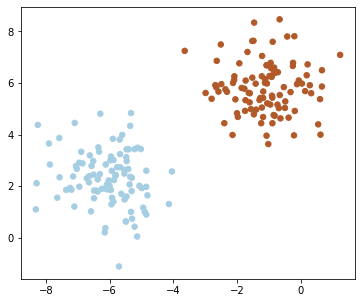

In [76]:
N = 200  # number of samples
D = 2  # number of dimensions
C = 2  # number of classes
seed = 1234  # for reproducible experiments 
alpha_tol = 1e-5 # threshold for choosing support vectors 
X, y = make_blobs(n_samples=N, n_features=D, centers=C, random_state=seed)
y[y == 0] = -1  # it is more convenient to have {-1, 1} as class labels (instead of {0, 1})
y = y.astype(np.float)
plt.figure(figsize=[6, 5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
plt.show()

In [74]:
alpha = solve_dual_svm(X, y)
w, b = compute_weights_and_bias(alpha, X, y)
print("w =", w)
print("b =", b)
print("Indices of support vectors:", np.arange(len(alpha))[alpha > alpha_tol])
print("Support vectors:", X[alpha > alpha_tol])

w = [0.73935606 0.41780426]
b = 0.9199060311606262
Indices of support vectors: [ 78 134 158 182]
Support vectors: [[-5.32793628  4.83313594]
 [-4.0459191   2.56444886]
 [-2.14234939  3.9827786 ]
 [-2.40004619  4.43910262]]


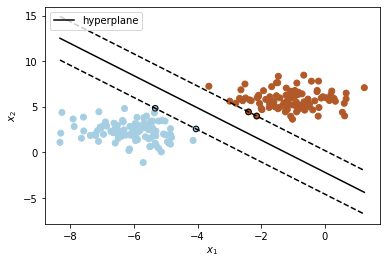

In [75]:
plot_data_with_hyperplane_and_support_vectors(X, y, alpha, w, b)
plt.show()